<ipython-input-13-5409952e9849>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("beta_0:%.2f" % beta_0)
<ipython-input-13-5409952e9849>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("beta_1:%.2f" % beta_1)


beta_0:2.32
beta_1:-0.46
Loss :1.52


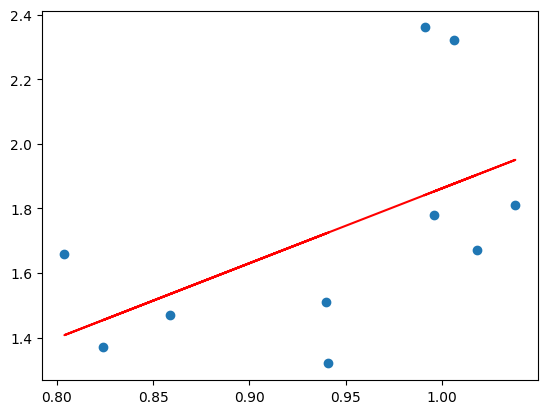

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv("/content/test.csv")
X = data.iloc[0:10, 5:6].values  # X는 타율, 출루율, 장타율
Y = data.iloc[2:12, -1].values  # Y는 War

def loss(x, y, beta_0, beta_1):
    ms = np.sum((y - (beta_0 * x + beta_1))**2)
    Loss = ms / len(x)
    return Loss

train_X = X.reshape(-1, 1)
train_Y = Y.reshape(-1, 1)
lrmodel = LinearRegression()
lrmodel.fit(train_X, train_Y)
beta_0 = lrmodel.coef_[0]
beta_1 = lrmodel.intercept_

plt.scatter(X, Y)
predict = lrmodel.predict(train_X)
plt.plot(train_X, predict, 'r')

print("beta_0:%.2f" % beta_0)
print("beta_1:%.2f" % beta_1)
print("Loss :%.2f" % loss(X, Y, beta_0, beta_1))


In [ ]:
# 출루율, 장타율, OPS와 War의 상관관계 추출

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 데이터 로드
data = pd.read_csv("/content/test.csv")
X = data.iloc[0:10, 3:6].values  # X는 출루율, 장타율, OPS
Y = data.iloc[2:12, -1].values  # Y는 War

lrmodel=LinearRegression()
lrmodel.fit(X,Y)

beta_0=lrmodel.coef_[0] # 출루율 가중치
beta_1=lrmodel.coef_[1] # 장타율 가중치
beta_2=lrmodel.coef_[2] # OPS 가중치
beta_3=lrmodel.intercept_ # 절편( 모든 독립변수가 0일 때, 종속변수의 예측값 )

def expected_war(OBP, SLG, OPS, beta_0,beta_1,beta_2,beta_3):
    value=np.array([OBP, SLG, OPS])
    weight=np.array([beta_0,beta_1,beta_2])
    war=value@weight+beta_3
    return war

OBP, SLG, OPS = eval(input('출루율, 장타율, OPS 입력:'))
print("예상 war: %f"%expected_war(OBP, SLG, OPS, beta_0,beta_1,beta_2,beta_3))

출루율, 장타율, OPS 입력:0.7, 0.2, 0.9
예상 war: 1.088699


In [ ]:
# 로스 값 구하기

def loss(X, Y, beta_0, beta_1, beta_2, beta_3):
    weight = np.array([beta_0, beta_1, beta_2])
    predictions = X.dot(weight) + beta_3
    diff = np.sum(np.power((Y - predictions), 2))
    return diff / len(X)

# 손실 함수 출력
print("Loss function ---> %.6f" % loss(X, Y, beta_0, beta_1, beta_2, beta_3))

Loss function ---> 0.058571


In [ ]:
# MSE와 결정계수 구하기

x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

lrmodel=LinearRegression()
lrmodel.fit(x_train,y_train)
beta_0=lrmodel.coef_[0] # 기울기
beta_1=lrmodel.coef_[1] # 기울기
beta_2=lrmodel.coef_[2] # 기울기
beta_3=lrmodel.intercept_ # 절편

predicted_y_train=lrmodel.predict(x_train)
mse_train=mean_squared_error(y_train,predicted_y_train)
print("MSE on train data: %f"%mse_train)

from sklearn.metrics import r2_score
r2_train = r2_score(y_train, predicted_y_train)
print("train의 결정계수:%f"%r2_train)

MSE on train data: 0.046554
train의 결정계수:0.619107


In [ ]:
# 다항식 회귀분석(Polynomial Regression)을 이용해 회귀분석 결과를 개선해보자.

OBP = X[0:, 0] # 출루율
SLG = X[0:, 1] # 장타율
poly = OBP * SLG

# 원래 특성 배열에 다항 특성 추가
xpoly = np.column_stack((poly, X))

x_train, x_test, y_train, y_test = train_test_split(xpoly, Y, test_size=0.2, random_state=5)

# 선형 회귀 모델 생성 및 훈련
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

# 계수 및 절편 추출
beta_0 = lrmodel.coef_[0]  # 출루율 * 장타율의 가중치
beta_1 = lrmodel.coef_[1]  # 장타율의 가중치
beta_2 = lrmodel.coef_[2]  # OPS의 가중치
beta_3 = lrmodel.intercept_


predicted_y_train = lrmodel.predict(x_train)

# MSE 계산
mse_train = mean_squared_error(y_train, predicted_y_train)
print("MSE on train data: %f" % mse_train)

# 결정계수 R^2 계산
r2_train = r2_score(y_train, predicted_y_train)
print("train의 결정계수: %f" % r2_train)

MSE on train data: 0.045580
train의 결정계수: 0.627074


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2) # poly = PolynomialFeatures(degree=2,interaction_only=True)와 비교
poly = poly.fit_transform(X)
x_train, x_test, y_train, y_test=train_test_split(poly,Y,test_size=0.2,random_state=5)
print('변인 개수:',len(x_train[0]))

lrmodel=LinearRegression()
lrmodel.fit(x_train,y_train)

predicted_y_train=lrmodel.predict(x_train)
mse_train=mean_squared_error(y_train,predicted_y_train)
print("MSE on train data: %f"%mse_train)

r2_train = r2_score(y_train, predicted_y_train)
print("train의 결정계수:%f"%r2_train)

변인 개수: 10
MSE on train data: 0.044519
train의 결정계수:0.635755
